In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datatime для работы с датами
import datetime
from datetime import datetime, date

# задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)     # задаем вывод в виде текста, а не HTML
pd.set_option('display.max_columns', 8)                # устанавливаем отображение максимального количества стобцов
pd.set_option('display.max_rows', 10)                  # устанавливаем отображение максимального количества строк
pd.set_option('display.width', 80)                     # устанавливаеv максимальную ширину отображения в символах

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt 
%matplotlib inline

__РАЗДЕЛЕНИЕ ДАННЫХ__

__Группировка по значениям отдельного столбца__

In [2]:
# считываем данные
sensor_data = pd.read_csv('./sensors.csv')
sensor_data.head(5)

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

In [3]:
# данные датчиков состоят из трех категориальных переменных (sensor, interval, axis) и одной количественной переменной (reading)
# Их можно сгруппировать с помощью любой категориальной переменной, передав имя переменной в метод .groupby ()
# группируем по столбцу Sensor
grouped_by_sensor = sensor_data.groupby('sensor')
grouped_by_sensor

In [4]:
# это промежуточный объект представляющий собой промежточное описание группировки которую мы создадим. Это необходимо для
# проверки перед запуском затротного вычислительного процесса

# получаем информацию о количестве групп которые будут созданы
grouped_by_sensor.ngroups

2

In [5]:
# свойство .groups вернет питоновский словяр, ключи которого будут представлять имена каждой группы (если будет указано
# несколько столбцов, это будет кортеж)
grouped_by_sensor.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

__Просмотр результатов группировки__

In [6]:
# вспомогательная функция, печатающая содержимое групп
def print_groups (group_object):
    # итерируем по всем группам, печатая название группы и первые пять наблюдений в ней
    for name, group in group_object:
        print(name)
        print(group[:5])

In [7]:
# смотрим содержимое созданных групп
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [8]:
# метод .size() возвращает сводку о размере каждой группы
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [9]:
# метод .count() возвращает количество элементов в каждом столбце каждой группы
grouped_by_sensor.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [40]:
# с помощью метода .get_group() можно извлечь любую конкретную группу
grouped_by_sensor.get_group('accel').head(3)

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0

In [11]:
# метод .nth() возвращает n-ю строку в каждой группе
grouped_by_sensor.nth(1)

    interval       sensor axis  reading
1          0        accel    Y      0.5
13         0  orientation    Y      0.1

In [12]:
# для вывода описательных статистик используем метод .describe()
grouped_by_sensor.describe()
                           

            interval                      ... reading                  
               count mean       std  min  ...     25%   50%    75%  max
sensor                                    ...                          
accel           12.0  1.5  1.167748  0.0  ...     0.2  0.35  0.725  1.0
orientation     12.0  1.5  1.167748  0.0  ...     0.0  0.10  0.225  0.4

[2 rows x 16 columns]

__Группировка по нескольким столбцам__

In [13]:
# группировку можно выполнить и по нескольким столбцам
# группируем по значениям sensor и axis
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

# поскольку было указано несколько столбцов, название каждой группы теперь является кортежем, представляющим уникальную
# комбинацию значений столбцов senssor и axis

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

__Группировка по уровням индекса__

In [14]:
# создаем копию данных и заново индексируем ее
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [15]:
# группируем по первому уровню индекса
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [16]:
# группируем по нескольким уровням индекса
print_groups(mi.groupby(level = ['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

__ПРИМЕНЕНИЕ АГРЕГИРУЮЩИХ ФУНКЦИЙ, ПРЕОБРАЗОВАНИЙ И ФИЛЬТРОВ__

__Применение агрегирующих функций к группам__

In [17]:
# Агрегирующие функции можно применить к каждой группе с помощью метода .aggregate() | .agg()
# Вычисляем среднее для каждого сенсора / оси
sensor_axis_grouping = mi.groupby(level = ['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [18]:
# вместо индекса, совпадающего с индексом исходного объекта, создаем числовой индекс и переносим уровни исходного 
# индекса в столбц
sensor_data.groupby(['sensor', 'axis'], as_index = False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [19]:
# можно просто применить агрегирующую функцию к группе
sensor_axis_grouping.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [20]:
# применяем сразу несколько агрегирующих функций
sensor_axis_grouping.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [21]:
# применяем к каждому столбцу свою функцию 
sensor_axis_grouping.agg({'interval': len,
                          'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [22]:
# вычисляем среднее только для столбца reading
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

__Преобразование групп данных__

In [23]:
# метод .transform() применяет ту или иную функцию ко всем значениям объекта DataFrame в каждой группе

# создаем объект DataFrame который будем использовать в примерах
transform_data = pd.DataFrame({'Label': ['A', 'C', 'B', 'A', 'C'],
                               'Values': [0, 1, 2, 3, 4],
                               'Values2': [5, 6, 7, 8, 9],
                               'Other': ['foo', 'bar', 'baz', 'fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

  Label  Values  Values2 Other
V     A       0        5   foo
W     C       1        6   bar
X     B       2        7   baz
Y     A       3        8   fiz
Z     C       4        9   buz

In [24]:
# сгруппироуем по столбцу label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


__Заполнение пропущенных значений групповым средним__

In [25]:
# создаем данные чтобы продемонстрировать способ замены пропусков
df = pd.DataFrame({'Label': list('ABABAB'),
                   'Values': [10, 20, 11, np.nan, 12, 22]})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [26]:
# вычисляем среднее для каждой группы с помощью метода .mean()
grouped.mean()

       Values
Label        
A        11.0
B        21.0

In [27]:
# используем метод .transform() чтобы заполнить значения Nan групповым средним
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

   Values
0    10.0
1    20.0
2    11.0
3    21.0
4    12.0
5    22.0

__Вычисление нормализованных z-значений с помощью преобразования__

In [28]:
# генерируем временной ряд со скользящими средними
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3),
                 pd.date_range('2013-01-01', periods = 365*3))
periods = 100
rolling = data.rolling(window = periods,
                       min_periods = periods,
                       center = False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

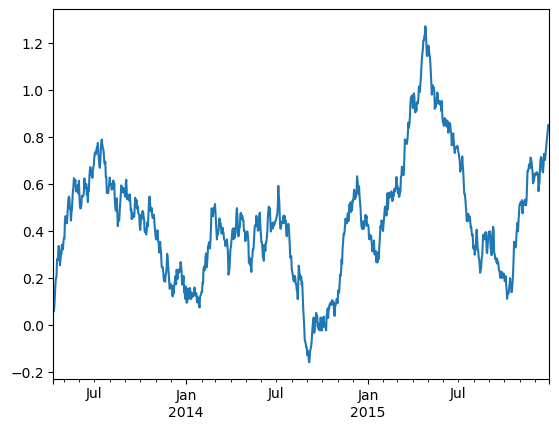

In [29]:
# визуализируем ряд
rolling.plot();

In [30]:
# вычисляем среднее и стандартное отклонение по каждому году
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

          mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [31]:
# для выполнения стандартизации следующий программный код задает функцию вычисляющую z-значения, применяет ее в качестве 
# преобразования к каждой группе и сообщает о новом среднем значении и новом стандартном отклонее
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

              mean  std
2013  2.195403e-16  1.0
2014 -2.223488e-16  1.0
2015  3.254626e-16  1.0

<Axes: >

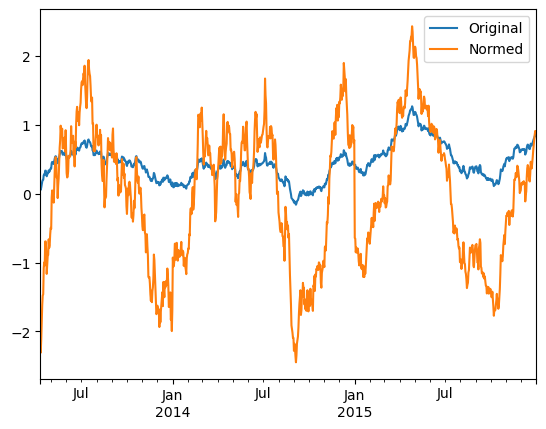

In [32]:
# визуализируем исходные и стандартизированные данные
compared = pd.DataFrame({'Original': rolling,
                         'Normed': normed})
compared.plot()

__Исключение групп из процедуры агрегирования__

In [33]:
# с помощью метода .filter() можно выборочно удалить группы данных из обработки. В этот метод передают функцию, с помощью
# которой по каждой группе можно принять решение о включении данной группы в итоговый результат. Если функция возвращает
# значение True, группа включается в результат, если False, группа исключается

# создаем данные для примеров
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

In [35]:
# удаляем группы с одним непропущенным значением и меньше
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [36]:
# удаляем группы где есть пропуски
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [37]:
# отбираем группы со средним 2.0 и выше
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0